<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/data_cleaning_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import movie_reviews

# Download the movie_reviews dataset
nltk.download('movie_reviews')

# Load data into a DataFrame
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert to DataFrame
df = pd.DataFrame(documents, columns=['text', 'label'])
df['text'] = df['text'].apply(lambda x: ' '.join(x))  # Join words into a single string
print(df.head())
print(f"Dataset shape: {df.shape}")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


                                                text label
0  plot : two teen couples go to a church party ,...   neg
1  the happy bastard ' s quick movie review damn ...   neg
2  it is movies like these that make a jaded movi...   neg
3  " quest for camelot " is warner bros . ' first...   neg
4  synopsis : a mentally unstable man undergoing ...   neg
Dataset shape: (2000, 2)


In [ ]:
df

,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard ' s quick movie review damn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' first...",neg
4,synopsis : a mentally unstable man undergoing ...,neg
...,...,...
1995,wow ! what a movie . it ' s everything a movie...,pos
1996,"richard gere can be a commanding actor , but h...",pos
1997,"glory -- starring matthew broderick , denzel w...",pos
1998,steven spielberg ' s second epic film on world...,pos


In [ ]:
# clearning steps :
# remove space, special characters, white space, make it lower case

import re
import string

# Function for basic text cleaning
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

# Apply cleaning to the dataset
df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"plot : two teen couples go to a church party ,...",plot two teen couples go to a church party dri...
1,the happy bastard ' s quick movie review damn ...,the happy bastard s quick movie review damn th...
2,it is movies like these that make a jaded movi...,it is movies like these that make a jaded movi...
3,""" quest for camelot "" is warner bros . ' first...",quest for camelot is warner bros first feature...
4,synopsis : a mentally unstable man undergoing ...,synopsis a mentally unstable man undergoing ps...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

# Apply stopword removal
df['cleaned_text_no_stop'] = df['cleaned_text'].apply(remove_stopwords)
df[['cleaned_text', 'cleaned_text_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_text,cleaned_text_no_stop
0,plot two teen couples go to a church party dri...,plot two teen couples go church party drink dr...
1,the happy bastard s quick movie review damn th...,happy bastard quick movie review damn y2k bug ...
2,it is movies like these that make a jaded movi...,movies like make jaded movie viewer thankful i...
3,quest for camelot is warner bros first feature...,quest camelot warner bros first feature length...
4,synopsis a mentally unstable man undergoing ps...,synopsis mentally unstable man undergoing psyc...


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for tokenization and lemmatization
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

# Apply tokenization and lemmatization
df['lemmatized_text'] = df['cleaned_text_no_stop'].apply(tokenize_and_lemmatize)
df[['cleaned_text_no_stop', 'lemmatized_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,cleaned_text_no_stop,lemmatized_text
0,plot two teen couples go church party drink dr...,plot two teen couple go church party drink dri...
1,happy bastard quick movie review damn y2k bug ...,happy bastard quick movie review damn y2k bug ...
2,movies like make jaded movie viewer thankful i...,movie like make jaded movie viewer thankful in...
3,quest camelot warner bros first feature length...,quest camelot warner bros first feature length...
4,synopsis mentally unstable man undergoing psyc...,synopsis mentally unstable man undergoing psyc...


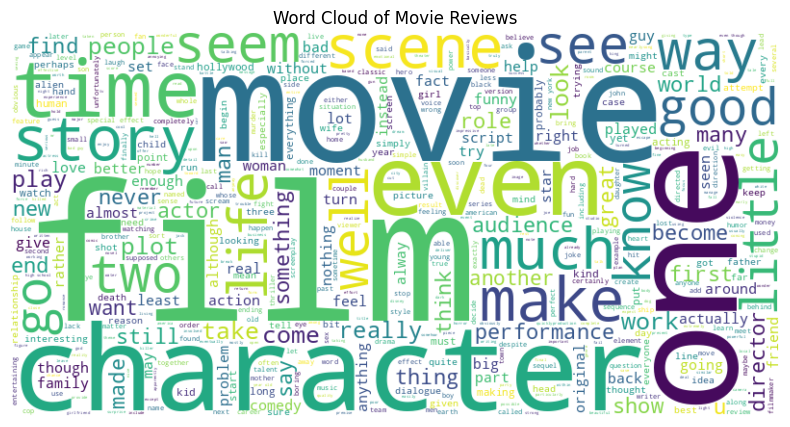

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized text for visualization
all_text = ' '.join(df['lemmatized_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

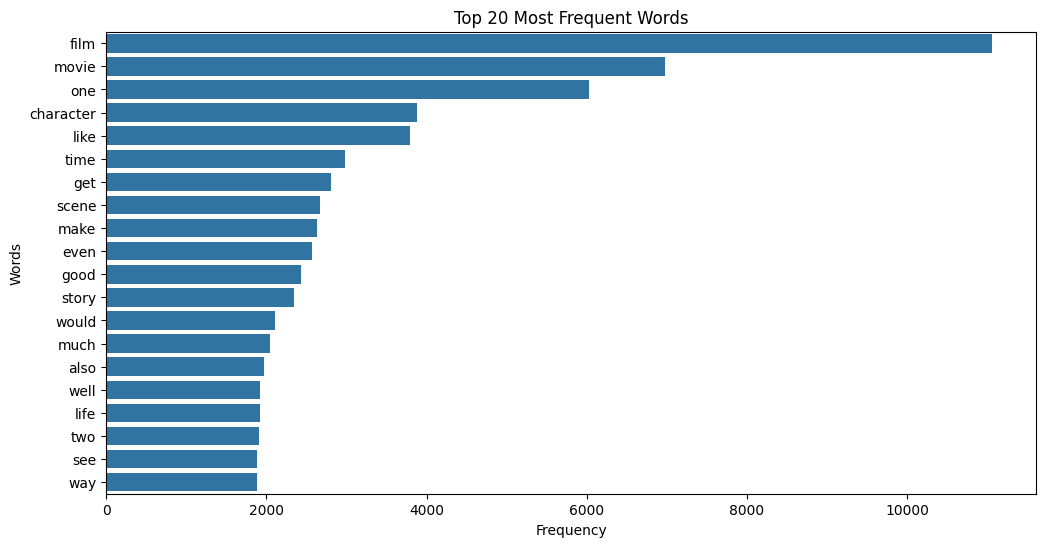

In [ ]:
from collections import Counter
import seaborn as sns

# Tokenize all lemmatized text
all_words = ' '.join(df['lemmatized_text']).split()
word_freq = Counter(all_words)

# Get the top 20 most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text, max_length=128):
    # Tokenize and encode text
    inputs = tokenizer(text, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    # Return the [CLS] token embedding (first token)
    return outputs.last_hidden_state[:, 0, :].numpy()

# Apply BERT embeddings to a subset of data
df_subset = df['lemmatized_text'].head(100)
bert_embeddings = np.vstack([get_bert_embeddings(text) for text in df_subset])

# Print shape of embeddings
print(f"BERT embeddings shape: {bert_embeddings.shape}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT embeddings shape: (100, 768)
